In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df=pd.read_csv("Mall_Customers.csv") #Loading the dataset
print("First 5 rows of the dataset")
df.head()

First 5 rows of the dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
print("Dataset Info:") # Exploratory Data Analysis
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
print("\nStatistical Summary:") # Statistics for the numeric columns
df.describe()


Statistical Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


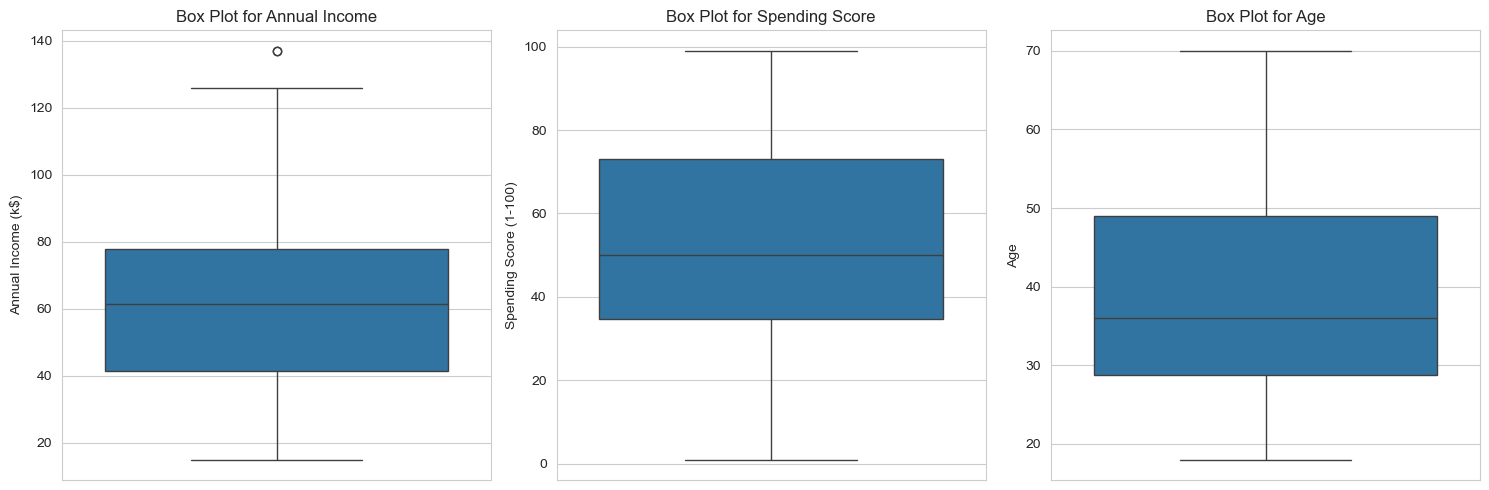

In [25]:
# Outlier Detection
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Box Plot for Annual Income')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Box Plot for Spending Score')
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Age'])
plt.title('Box Plot for Age')

plt.tight_layout()
plt.show()

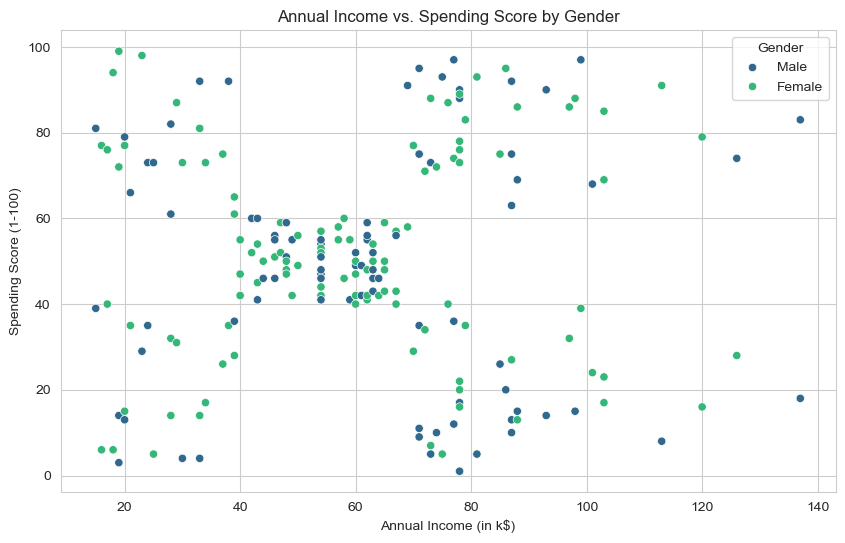

In [26]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender', 
    palette='viridis'
)
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

In [27]:
# Check for inconcistencies in the 'Gender' column
print("Unique values in 'Gender' column:", df['Gender'].unique())

Unique values in 'Gender' column: ['Male' 'Female']


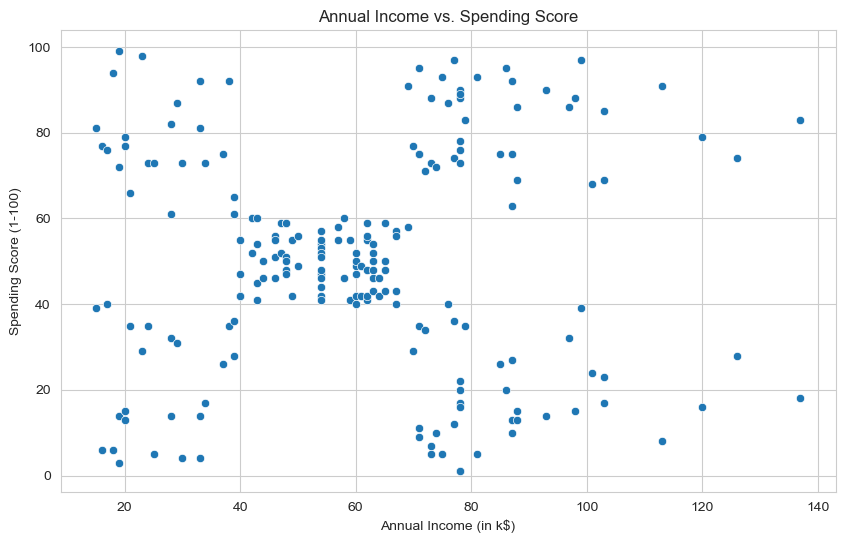

In [28]:
# Plot for Annual Income vs. Spending Score
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [29]:
# New Category "Visit Frequency"
df['Visit Frequency (Monthly)'] = np.random.randint(1, 6, size=len(df)) 
df.loc[df['Spending Score (1-100)'] > 70, 'Visit Frequency (Monthly)'] = np.random.randint(8, 15, size=len(df[df['Spending Score (1-100)'] > 70]))
df.loc[df['Spending Score (1-100)'].between(40, 70), 'Visit Frequency (Monthly)'] = np.random.randint(5, 9, size=len(df[df['Spending Score (1-100)'].between(40, 70)]))
print("Created 'Visit Frequency (Monthly)' column.")

Created 'Visit Frequency (Monthly)' column.


In [30]:
# New Category "Age Group"
bins = [18, 25, 40, 60, 70]
labels = ['18-25', '26-40', '41-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print("Created 'Age Group' column.")

Created 'Age Group' column.


In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Visit Frequency (Monthly),Age Group
0,1,Male,19,15,39,3,18-25
1,2,Male,21,15,81,13,18-25
2,3,Female,20,16,6,5,18-25
3,4,Female,23,16,77,11,18-25
4,5,Female,31,17,40,6,26-40


In [32]:
# Scaling the Data for Clustering
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.preprocessing import StandardScaler
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)', 'Visit Frequency (Monthly)']
X = df[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data selected and scaled successfully.")

Data selected and scaled successfully.


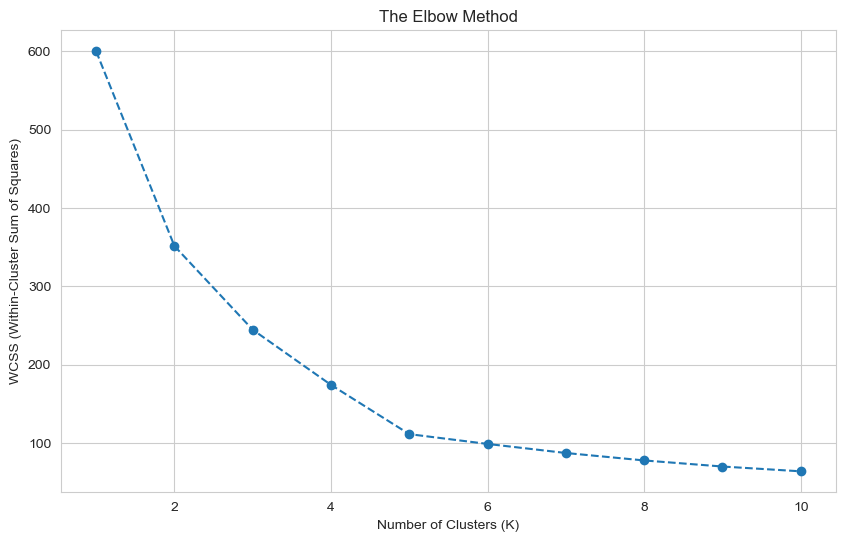

In [33]:
# Clustering Technique 1: K-Means Clustering
from sklearn.cluster import KMeans
# Elbow Method
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6)) # Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [34]:
# Training K-Means model with K=6
from sklearn.metrics import silhouette_score
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = y_kmeans
#  Using Silhouette Score for Evaluating the Model
kmeans_silhouette = silhouette_score(X_scaled, y_kmeans)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

K-Means Silhouette Score: 0.501


In [35]:
# Clustering Technique 2: DBSCAN Clustering
from sklearn.cluster import DBSCAN
# Training the Model
dbscan = DBSCAN(eps=0.6, min_samples=8)
y_dbscan = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = y_dbscan
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)
print(f'DBSCAN found {n_clusters_} clusters.')
print(f'DBSCAN identified {n_noise_} noise points (outliers).')

DBSCAN found 5 clusters.
DBSCAN identified 44 noise points (outliers).


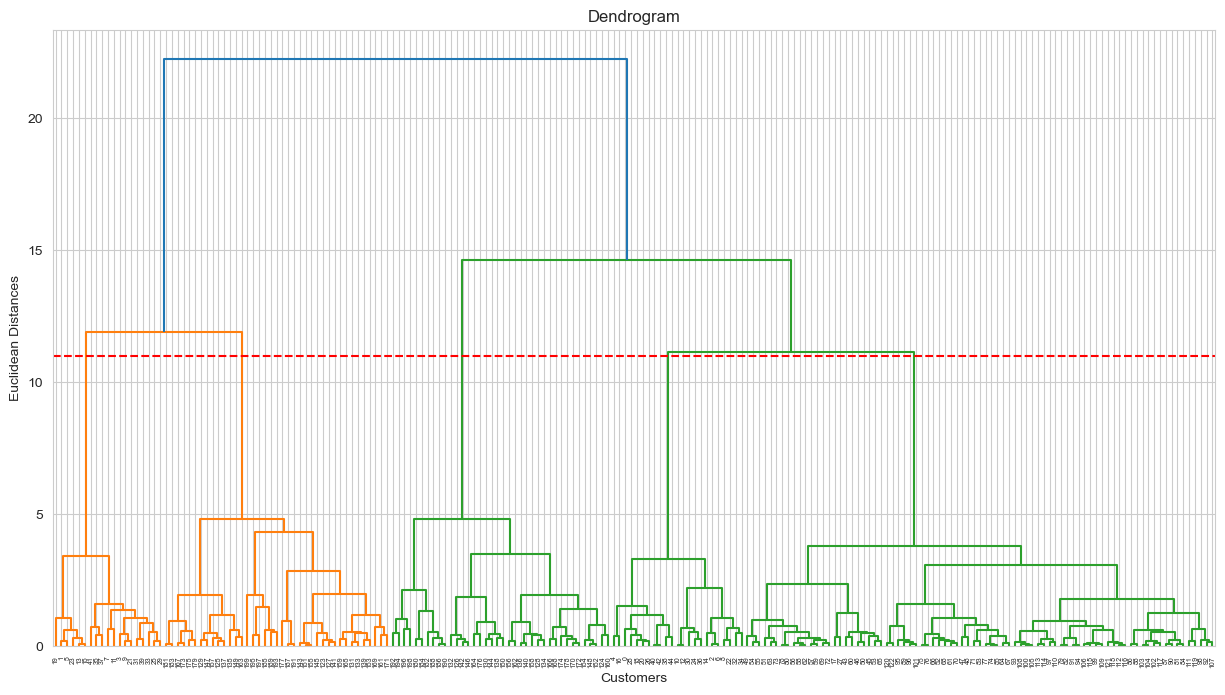

In [36]:
# Clustering Technique 3: Agglomerative Hierarchical Clustering
import scipy.cluster.hierarchy as sch
# Dendrogram
plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=11, color='r', linestyle='--') 
plt.show()

In [37]:
# Training the Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_agg = agg_cluster.fit_predict(X_scaled)
df['Agg_Cluster'] = y_agg
# Evaluating the model using Silhouette Score
agg_silhouette = silhouette_score(X_scaled, y_agg) 
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.3f}")

Agglomerative Clustering Silhouette Score: 0.480


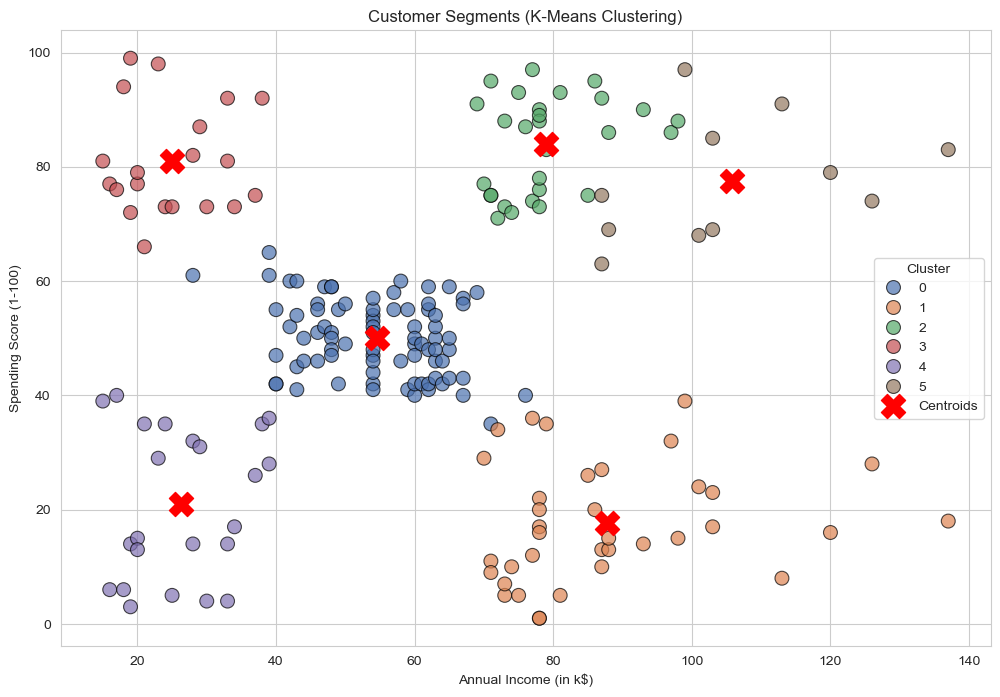

In [38]:
# 2-D Plot for K-Means
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster', 
    palette='deep',       
    s=100,                
    alpha=0.7,            
    edgecolor='k'
)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)


plt.scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    s=300,                
    c='red',              
    marker='X',           
    label='Centroids'
)

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.savefig('figure_4_1_kmeans_clusters.png', dpi=300)
plt.show()

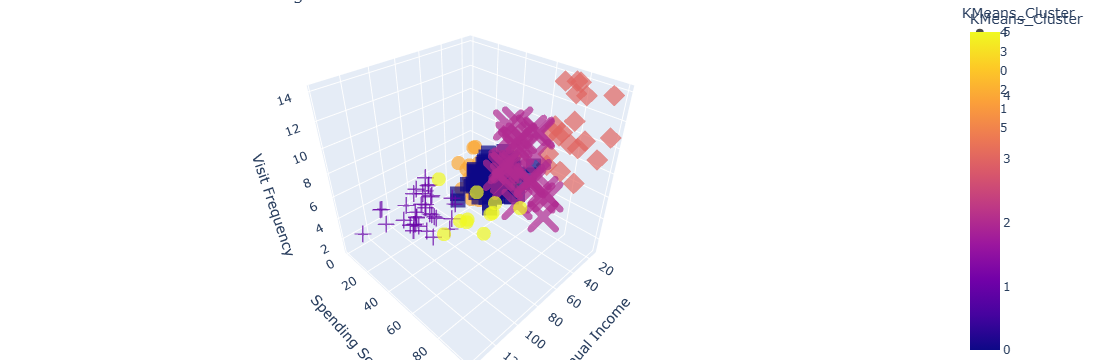

In [39]:
import plotly.express as px
# 3D Plot Visualization
fig = px.scatter_3d(df, 
                    x='Annual Income (k$)', 
                    y='Spending Score (1-100)', 
                    z='Visit Frequency (Monthly)',
                    color='KMeans_Cluster', 
                    symbol='KMeans_Cluster',
                    size_max=10,
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title_text='Interactive 3D Customer Segments',
                  scene=dict(
                      xaxis=dict(title='Annual Income'),
                      yaxis=dict(title='Spending Score'),
                      zaxis=dict(title='Visit Frequency ')
                  ))
fig.show()

In [40]:
# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('KMeans_Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Visit Frequency (Monthly)': 'mean',
    'Age': 'mean',
    'Age Group': lambda x: x.mode()[0]  # Most common age group
}).reset_index()
cluster_analysis.sort_values(by='Spending Score (1-100)', ascending=False)

,KMeans_Cluster,Annual Income (k$),Spending Score (1-100),Visit Frequency (Monthly),Age,Age Group
2,2,78.964286,83.928571,10.964286,33.107143,26-40
3,3,24.950000,81.000000,10.900000,24.850000,18-25
5,5,105.818182,77.545455,8.545455,31.636364,26-40
0,0,54.560976,50.036585,6.414634,42.609756,41-60
4,4,26.304348,20.913043,3.130435,45.217391,41-60
1,1,87.750000,17.583333,3.055556,40.666667,41-60
